# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Nolan Moss

### GitHub Repo: https://github.com/Crusoe22/Module7-final-web-mining

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [65]:
# Import and test necessary packages
import json
import pickle
import requests
import spacy
import spacytextblob
from bs4 import BeautifulSoup
import html5lib
import jupyterlab
import matplotlib


print('All prereqs installed.')
!pip list

All prereqs installed.
Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

## Saving HTML Content to a Pickle File

This Python script fetchs the HTML content of a web page and save it as a `.pkl` file using the `requests` and `pickle` libraries. 


In [ ]:
import requests
import pickle

# Define the URL to fetch
url = "https://mgiss.co.uk/the-future-of-gis-trends-in-geospatial-technology/"


# Fetch the HTML content
response = requests.get(url)
response.raise_for_status()  # Raise an error if the request was unsuccessful

# Extract the HTML content
html_content = response.text

# Save the HTML content to a .pkl file
with open("gis_article.pkl", "wb") as file:
    pickle.dump(html_content, file)
print("HTML content saved to article_html.pkl successfully!")

HTML content saved to article_html.pkl successfully!


beautifulsoup4            4.12.3
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing                 2.1.0
fastjsonschema            2.20.0
fonttools                 4.55.0
fqdn                      1.5.1
h11                       0.14.0
html5lib                  1.1
httpcore                  1.0.7
httpx                     0.27.2
idna                      3.10
ipykernel                 6.29.5
ipython                   8.29.0
isoduration               20.11.0
jedi                      0.19.2
Jinja2                    3.1.4
joblib                    1.4.2
json5                     0.9.

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

## Sentiment Analysis on HTML Content

This Python script loads and processes the HTML content of a webpage stored in a pickle file, and performs sentiment analysis on the text using SpaCy and the SpaCyTextBlob extension. It then prints a polarity score and the total number of sentences. 


In [ ]:
import spacy
import pickle
from bs4 import BeautifulSoup

# Load SpaCy and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the contents of the pickle file
file_path = 'gis_article.pkl'
with open(file_path, 'rb') as file:  # Open in binary mode
    data = pickle.load(file)

# If data is a dictionary, extract the HTML content; otherwise, use the data as-is
html_content = data.get('html_content', '') if isinstance(data, dict) else data

# Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text()


# Perform sentiment analysis on the text
doc = nlp(text)
polarity = doc._.blob.polarity

# Print the polarity score with an appropriate label
if polarity > 0:
    sentiment_label = "Positive"
elif polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"
print(f"Polarity score: {polarity:} ({sentiment_label})")

# Count the number of sentences
num_sentences = len(list(doc.sents))
print(f"Number of sentences in the article: {num_sentences}")


 




















The Future of GIS: Trends in Geospatial Technology






















































Enquire

Tel: +44 (0)151 329 0820

Support Log in







GNSS Hardware & Positioning

GNSS Hardware & Positioning
Complete High-accuracy Data Capture Solutions
Arrow Series® GNSS Receivers
Leica Zeno GNSS Receivers
SmartNet – Satellite Positioning Service
Atlas Correction Service
Data Services


Geospatial & 3D Software

Geospatial & 3D Software
ArcGIS Online, the world’s leading GIS software
ArcGIS Pro- the world’s leading GIS software
Esri Data Collectors
Leica Zeno Mobile
vSite by vGIS: Situational Awareness


Solutions

Solutions
DDMS for Highways for ArcGIS
Manhole Surveys
CADTransform for ArcGIS
Z-Transform for ArcGIS
IPAS  (Interruption Prevention Alert Service)


Services

Services
GIS Consultancy
GIS Development
GIS Support
GIS Training


Case Studies & Sectors

Our Impact
Case Studies
Environment
Infrastructure
Utilities


About

Why MGISS
News
Partne

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

## Token Frequency Analysis

This Python script performs token frequency analysis on the HTML content of a webpage. The script extracts the text from an HTML file stored as a pickle, processes the text using SpaCy, and counts the frequency of the most common tokens, excluding punctuation, stopwords, and whitespace.


In [ ]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the HTML content from the .pkl file
with open("gis_article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML and extract text
soup = BeautifulSoup(html_content, "html.parser")
text_content = soup.get_text()

# Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the text content with spaCy
doc = nlp(text_content)

# Filter tokens (convert to lowercase, remove punctuation, stopwords, and whitespace)
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_punct and not token.is_stop and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print results
print("5 Most Frequent Tokens (excluding punctuation, stopwords, and whitespace):")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

5 Most Frequent Tokens (excluding punctuation, stopwords, and whitespace):
Token: gis, Frequency: 69
Token: data, Frequency: 34
Token: geospatial, Frequency: 22
Token: technology, Frequency: 22
Token: ai, Frequency: 12


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

## Lemma Frequency Analysis

This Python script performs frequency analysis on lemmas extracted from the text of an HTML webpage. The script loads the HTML content from a pickle file, processes the text with SpaCy, and counts the frequency of the most common lemmas, excluding punctuation, stopwords, and whitespace.


In [ ]:

# Step 1: Load the HTML content from the .pkl file
with open("gis_article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Step 2: Parse the HTML and extract text
soup = BeautifulSoup(html_content, "html.parser")
text_content = soup.get_text()

# Step 3: Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the text content with spaCy
doc = nlp(text_content)

# Step 5: Extract and filter lemmas (remove punctuation, stopwords, whitespace)
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_punct and not token.is_stop and not token.is_space
]

# Step 6: Count lemma frequencies
lemma_freq = Counter(lemmas)

# Step 7: Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Step 8: Print results
print("5 Most Frequent Lemmas (excluding punctuation, stopwords, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

5 Most Frequent Lemmas (excluding punctuation, stopwords, and whitespace):
Lemma: gis, Frequency: 69
Lemma: technology, Frequency: 31
Lemma: geospatial, Frequency: 22
Lemma: datum, Frequency: 22
Lemma: data, Frequency: 12


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Token-Based Sentence Scoring and Histogram Visualization

This Python script performs sentence scoring based on the presence of "interesting tokens" in each sentence of a text. The score is calculated as the proportion of interesting tokens in the sentence. The results are visualized using a histogram to show the distribution of sentence scores.


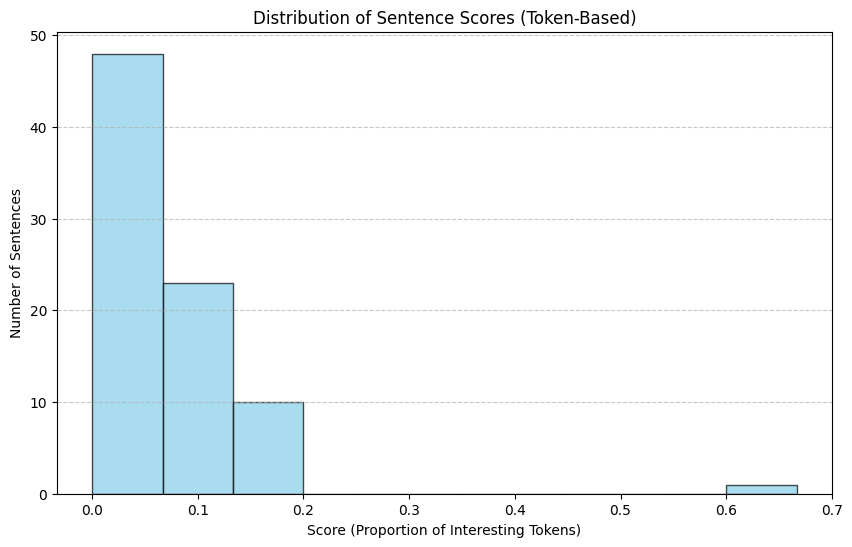

In [ ]:
import matplotlib.pyplot as plt
import spacy

# Define scoring by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Extract the tokens from the sentence
    tokens = [token.text.lower() for token in sentence if not token.is_space]
    if len(tokens) == 0:
        return 0
    # Count how many tokens are interesting
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens)

# Load the article text and process it with spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_content)  # 'text_content' should contain the article text

# Interesting tokens (use the most frequent ones identified earlier)
interesting_tokens = ["gis", "data", "geospatial", "technology", "ai"]

# Compute scores for every sentence using tokens
sentence_scores = [
    score_sentence_by_token(sentence, interesting_tokens) for sentence in doc.sents
]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentence Scores (Token-Based)")
plt.xlabel("Score (Proportion of Interesting Tokens)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment on the most common range of scores
# After examining the histogram, the most common range of scores appears to be between 0.0 and 0.1,


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Lemma-Based Sentence Scoring and Histogram Visualization

This Python script performs sentence scoring based on the presence of "interesting lemmas" in each sentence of a text. The score is calculated as the proportion of interesting lemmas in the sentence. The results are visualized using a histogram to show the distribution of sentence scores.


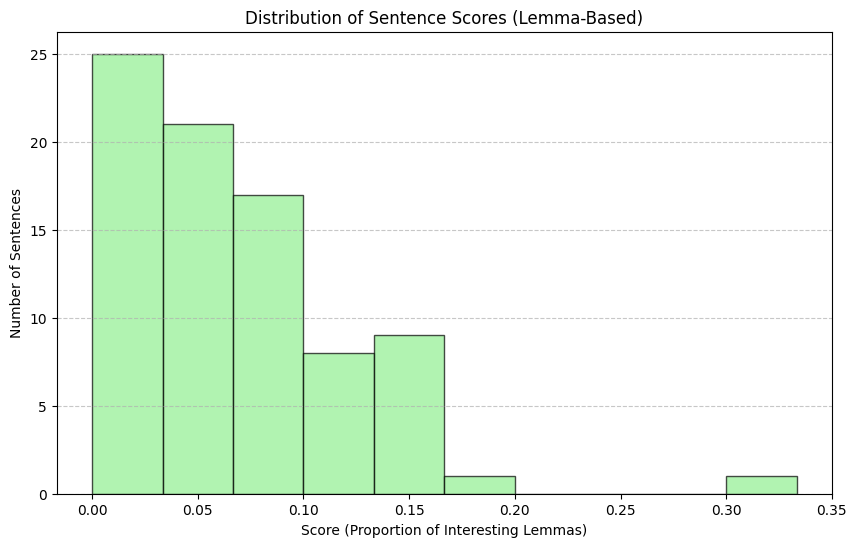

In [ ]:
import matplotlib.pyplot as plt
import spacy

# Define scoring by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Extract the lemmas from the sentence
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_space]
    if len(lemmas) == 0:
        return 0
    # Count how many lemmas are interesting
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return interesting_count / len(lemmas)

# Load the article text and process it with spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_content)  # 'text_content' should contain the article text

# Interesting lemmas (use the most frequent ones identified earlier)
interesting_lemmas = ["gis", "technology", "geospatial", "data", "datum"]

# Compute scores for every sentence using lemmas
sentence_lemma_scores = [
    score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in doc.sents
]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_lemma_scores, bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentence Scores (Lemma-Based)")
plt.xlabel("Score (Proportion of Interesting Lemmas)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment on the most common range of scores
# After examining the histogram, it appears that the most common range of scores is between 0.0 and 0.15,


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.15
* Cutoff Score (lemmas): 0.10

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Token-Based Sentence Filtering for Article Summary

This Python script generates a summary of an article by selecting sentences that have a token-based score above a specified cutoff. The token score is calculated based on the proportion of interesting tokens in each sentence. Sentences with a score higher than the cutoff are included in the summary.


In [ ]:
import numpy as np

# Assuming `doc` is the document and `sentence_scores` holds the calculated token scores
cutoff_token_score = 0.14  # Token cutoff score

# Record the cutoff score
print(f"Cutoff Score (tokens): {cutoff_token_score}")

# Step 1: Filter sentences with token-based scores above the cutoff
summary_sentences = [
    sent.text.strip()  # Add sentence text to list if its score is greater than cutoff
    for sent, score in zip(doc.sents, sentence_scores)
    if score > cutoff_token_score
]

# Step 2: Join the sentences to create a summary
summary_text = ' '.join(summary_sentences)

# Print the summary
print("Summary of the article:")
print(summary_text)


Cutoff Score (tokens): 0.14
Summary of the article:
Availability of New Data Sources and Analytical Methods:

Multiple Data sources and their analysis methods, bid data progressing, and digital platforms all are increasing day by day, leading to high demand for GIS technology.


Trends and Innovations in GIS Technology:
GIS technologies are emerging in every field of our lives. Real-Time and Big Data Analysis:
Real-time data analysis in GIS projects integrates various data sources like sensors and satellites. Geospatial AI: At its core, geospatial AI uses AI algorithms to analyze and interpret vast amounts of geospatial data, which includes geographic information such as maps, satellite imagery, GPS data, and other spatial data sources. The applications of geospatial AI are diverse and far-reaching. Many more industries and sectors will know about the vastness of GIS technology and how much value there is in geospatial data. Independently advising on the smarter use of Geospatial data,

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Sentiment Analysis of Article Summary

This Python script calculates the sentiment polarity of the generated summary. The sentiment polarity score, ranging from -1 (negative) to 1 (positive), provides an indication of the overall sentiment of the summary. The script also prints the number of sentences included in the summary.


In [ ]:
from textblob import TextBlob

# Step 3: Calculate polarity score of the summary
blob = TextBlob(summary_text)
polarity_score = blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

# Step 4: Print the polarity score and the number of sentences in the summary
print(f"Polarity score of the summary: {polarity_score}")
print(f"Number of sentences in the summary: {len(summary_sentences)}")


Polarity score of the summary: 0.09795454545454545
Number of sentences in the summary: 7


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Lemma-Based Sentence Filtering for Article Summary

This Python script generates a summary of an article by selecting sentences that have a lemma-based score above a specified cutoff. The lemma score is calculated based on the proportion of interesting lemmas in each sentence. Sentences with a score higher than the cutoff are included in the summary.


In [ ]:
# `doc` is the document and `sentence_lemma_scores` holds the calculated lemma scores
cutoff_lemma_score = 0.14  # Lemma cutoff score

# Record the cutoff score
print(f"Cutoff Score (lemmas): {cutoff_lemma_score}")

# Step 1: Filter sentences with lemma-based scores above the cutoff
summary_lemma_sentences = [
    sent.text.strip()  # Add sentence text to list if its lemma score is greater than cutoff
    for sent, score in zip(doc.sents, sentence_lemma_scores)
    if score > cutoff_lemma_score
]

# Step 2: Join the sentences to create a summary
summary_lemma_text = ' '.join(summary_lemma_sentences)

# Print the summary
print("Summary of the article:")
print(summary_lemma_text)


Cutoff Score (lemmas): 0.14
Summary of the article:
Availability of New Data Sources and Analytical Methods:

Multiple Data sources and their analysis methods, bid data progressing, and digital platforms all are increasing day by day, leading to high demand for GIS technology.


Trends and Innovations in GIS Technology:
GIS technologies are emerging in every field of our lives. Some technologies are making GIS technology more accessible, these include:

Cloud computing
Mobile GIS
Machine Learning
Drone-based GIS
3D and digital twins
Automation
Self-drive cars
Real-time and extensive data analysis
Miniaturisation of sensors
Artificial Intelligence
AR technology

Miniaturisation of sensors: Real-Time and Big Data Analysis:
Real-time data analysis in GIS projects integrates various data sources like sensors and satellites. Geospatial AI: Many more industries and sectors will know about the vastness of GIS technology and how much value there is in geospatial data. Independently advising on

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Sentiment Analysis of Article Summary

This Python script calculates the sentiment polarity of the generated summary. The sentiment polarity score, ranging from -1 (negative) to 1 (positive), provides an indication of the overall sentiment of the summary. The script also prints the number of sentences included in the summary.


In [ ]:
from textblob import TextBlob

# Step 3: Calculate polarity score of the summary
blob = TextBlob(summary_lemma_text)
polarity_score = blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

# Step 4: Print the polarity score and the number of sentences in the summary
print(f"Polarity score of the summary: {polarity_score}")
print(f"Number of sentences in the summary: {len(summary_lemma_sentences)}")


Polarity score of the summary: 0.11071022727272727
Number of sentences in the summary: 6


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

**The polarity scores of the summaries are higher than the polarity score of the initial article. This likely results from the fact that the process of filtering sentences based on their importance (via token or lemma scores) retains only the more positive or significant sentences, leaving out potentially neutral or negative content.**

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

**The article's content doesn't address a particularly polarizing topic, nor does it rely heavily on descriptive language, which I believe is why the calculated polarity scores are so similar across the board. In my opinion, the polarity scores for the summaries better reflect the true tone of the article. Using the overall polarity score of the entire article tends to include a lot of neutral language, which likely dilutes the overall positive sentiment. The summaries, on the other hand, likely filter out extraneous information, resulting in a higher concentration of positive language.**